In [ ]:
# Install Kaggle API if not available
!pip install kaggle

# Make a kaggle.json file from your Kaggle account (Account → API → Create New API Token)
# Upload kaggle.json
from google.colab import files
files.upload()

# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle (2).json
usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: unrecognized arguments: Dog Classifier
unzip:  cannot find or open dogs-vs-cats.zip, dogs-vs-cats.zip.zip or dogs-vs-cats.zip.ZIP.
unzip:  cannot find or open data/train.zip, data/train.zip.zip or data/train.zip.ZIP.
unzip:  cannot find or open data/test1.zip, data/test1.zip.zip or data/test1.zip.ZIP.


In [ ]:
!kaggle datasets download -d mahdinavaei/cat-and-dog-classifier
!unzip cat-and-dog-classifier.zip -d /content/data/

Dataset URL: https://www.kaggle.com/datasets/mahdinavaei/cat-and-dog-classifier
License(s): unknown
  0% 0.00/126M [00:00<?, ?B/s]
100% 126M/126M [00:00<00:00, 1.74GB/s]
Archive:  cat-and-dog-classifier.zip
  inflating: /content/data/data/Cat/000122_ZV_SCSW_HeroImages_1900x1024_D1.jpg  
  inflating: /content/data/data/Cat/00tb-cats1-videoSixteenByNine3000.jpg  
  inflating: /content/data/data/Cat/07CAT-STRIPES-superJumbo.jpg  
  inflating: /content/data/data/Cat/1169131-two-cats-outside-banner_990x350.jpg  
  inflating: /content/data/data/Cat/1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg  
  inflating: /content/data/data/Cat/1200px-Cat03.jpg  
  inflating: /content/data/data/Cat/1200px-RedCat_8727.jpg  
  inflating: /content/data/data/Cat/1521-WIRED-Cat.jpeg  
  inflating: /content/data/data/Cat/1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg  
  inflating: /content/data/data/Cat/1_5978274.jpg  
  inflating: /content/data/data/Cat/2.jpg  
  inflating: /content/data/data/

In [ ]:
data = "/content/data/data"

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr

%matplotlib inline


In [ ]:
# Load image data into a TensorFlow dataset
data = tf.keras.utils.image_dataset_from_directory('/content/data/data')

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 1152 files belonging to 2 classes.


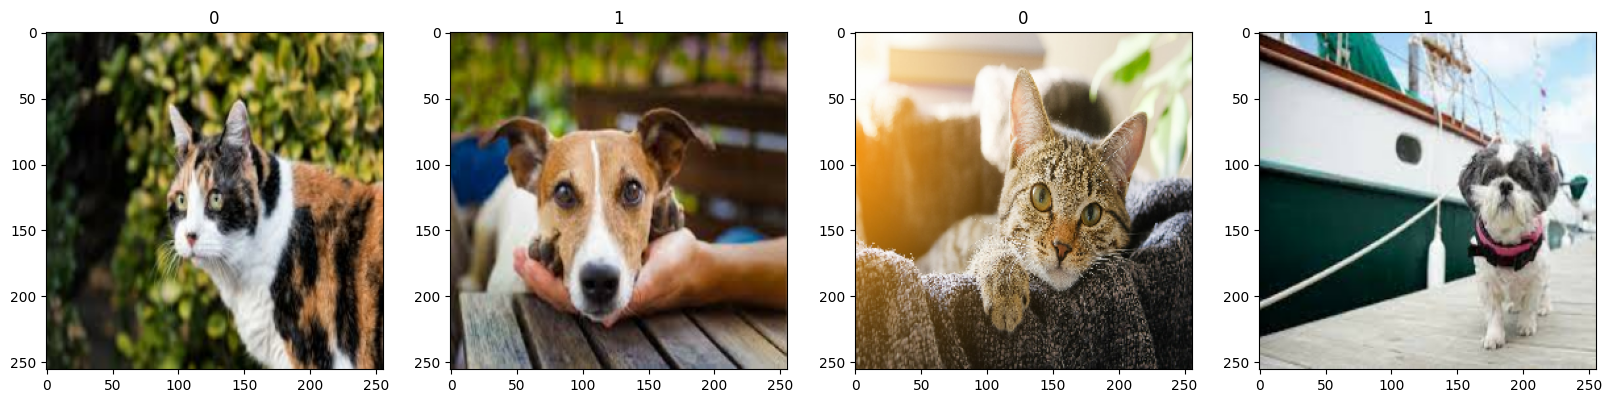

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[0.5058824 , 0.52156866, 0.5176471 ],
          [0.50523895, 0.5209252 , 0.51700366],
          [0.50088847, 0.51657474, 0.5126532 ],
          ...,
          [0.85775125, 0.8830576 , 0.8566789 ],
          [0.86210173, 0.89938724, 0.86865807],
          [0.87386644, 0.9130821 , 0.8817096 ]],
 
         [[0.50576717, 0.52145344, 0.5175319 ],
          [0.5034782 , 0.5191645 , 0.51524293],
          [0.50088847, 0.51657474, 0.5126532 ],
          ...,
          [0.85564494, 0.8809513 , 0.8545726 ],
          [0.86351687, 0.8955202 , 0.86655176],
          [0.86999935, 0.9088695 , 0.8776121 ]],
 
         [[0.50482076, 0.52050704, 0.51658547],
          [0.50181377, 0.51750004, 0.5135785 ],
          [0.49999234, 0.51567864, 0.5117571 ],
          ...,
          [0.85138625, 0.87490034, 0.8482767 ],
          [0.8627972 , 0.8884559 , 0.86100495],
          [0.8665686 , 0.9025015 , 0.87134343]],
 
         ...,
 
         [[0.04493564, 0.05506741, 0.05064949],
          [0.04020

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5225 - loss: 0.7490 - val_accuracy: 0.4777 - val_loss: 0.6909
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5691 - loss: 0.6881 - val_accuracy: 0.6161 - val_loss: 0.6487
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6198 - loss: 0.6537